In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC, SVC


In [2]:

X = pd.read_csv("../dataset/extracted_features.csv").values
y = pd.read_csv("../dataset/labels.csv").values
# images = pd.read_csv("../dataset/raw_images.csv").values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
y_train = y_train.ravel()


In [9]:
def logreg_explore_and_graph(c_vals):
    hyperparameters = dict(C=c_vals)
    clf = GridSearchCV(LogisticRegression(), hyperparameters, cv=4)
    clf.fit(X_train, y_train)
    scores_logreg = clf.cv_results_['mean_test_score']
    std_scores = clf.cv_results_['std_test_score']
    optimal_c_val = clf.best_params_['C']
    print("Best C: ", optimal_c_val)
    print("Train score: ", LogisticRegression(C=optimal_c_val).fit(X_train, y_train).score(X_train, y_train))
    print(std_scores)
    fig, ax = plt.subplots()
    fig.set_figheight(8)
    fig.set_figwidth(8)
    plt.plot(c_vals, scores_logreg)
    plt.xlabel('C Value')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()

    fig, ax = plt.subplots()
    fig.set_figheight(4)
    fig.set_figwidth(4)
    plt.plot(c_vals, std_scores)
    plt.xlabel('C Value')
    plt.ylabel('Cross-Validated Standard Deviation')
    plt.show()


/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

Best C:  1.0
Train score:  0.9791549295774647
[0.01648309 0.01829035 0.01642522 0.01804577 0.02015611 0.01732795
 0.01848025 0.01636714 0.01863418 0.01837691]


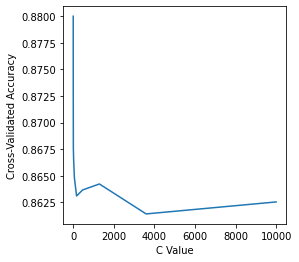

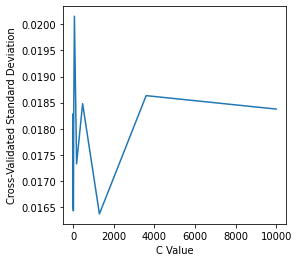

In [4]:
logreg_explore_and_graph(np.logspace(0, 4, 10))

/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

Best C:  10.0
Train score:  0.9819718309859155
[0.02073056 0.0172177  0.0172177  0.0211849  0.02092865 0.01962958
 0.02179051 0.0182208  0.01956479 0.01802817 0.01931992 0.01983867
 0.01848025 0.0182208  0.02020329 0.01962958 0.0182208  0.01890475
 0.01684498 0.01938552]


/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


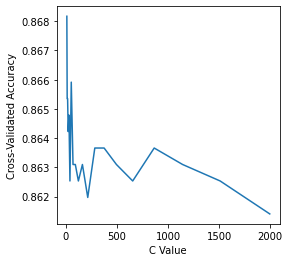

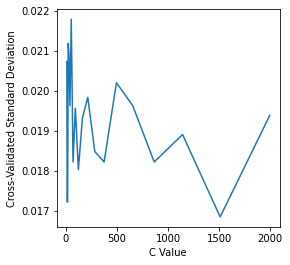

In [5]:
logreg_explore_and_graph(np.logspace(1, 3.3, 20))

/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:811: RuntimeWarning: divide by zero encountered in double_scalars
  args=(X, target, 1.0 / C, sample_weight),
/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:301: RuntimeWarning: invalid value encountered in double_scalars
  loss += 0.5 * alpha * squared_norm(w)
/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:352: RuntimeWarning: invalid value encountered in multiply
  grad[:, :n_features] += alpha * w
/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproc

Best C:  0.1282051282051282
Train score:  0.9740845070422535
[0.         0.0158349  0.01708817 0.01486299 0.01736455 0.01661733
 0.01628939 0.01528412 0.01846306 0.0174193  0.01559251 0.01786902
 0.01740107 0.01609336 0.01617206 0.01619167 0.01665549 0.0154904
 0.01515901 0.01496939 0.0182208  0.01686381 0.01802817 0.0182208
 0.01979061 0.01956479 0.01913835 0.01811598 0.01868521 0.01888795
 0.01880374 0.01603408 0.01825561 0.01893829 0.01736455 0.01865121
 0.0182208  0.01913835 0.01851457 0.01848025]


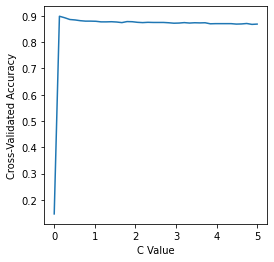

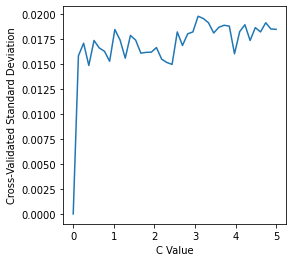

In [6]:
logreg_explore_and_graph(np.linspace(0, 5, 40))

/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

Best C:  0.026615384615384617
Train score:  0.9616901408450704
[0.00977283 0.02035198 0.0209914  0.02020031 0.01972081 0.01836685
 0.01920055 0.01928126 0.02111016 0.02096139 0.02147553 0.02072631
 0.01895881 0.01743018 0.01871439 0.01691918 0.01823459 0.01827468
 0.01827468 0.01678691 0.01678691 0.01694824 0.01723921 0.0147294
 0.01745776 0.0181871  0.01843569 0.01733139 0.01840245 0.01840245
 0.01840245 0.0164961  0.01763447 0.01846009 0.01800822 0.0192775
 0.01959796 0.0187946  0.01800822 0.02030279]


/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


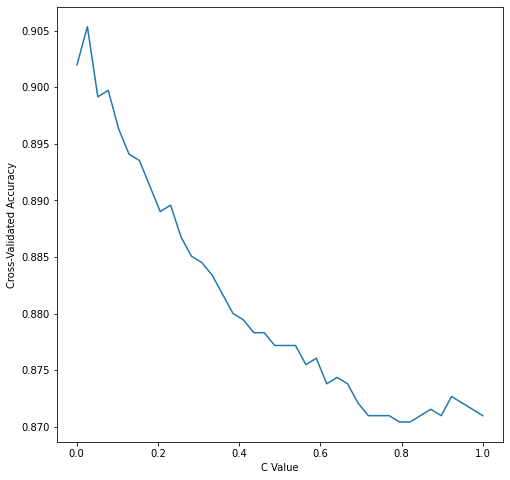

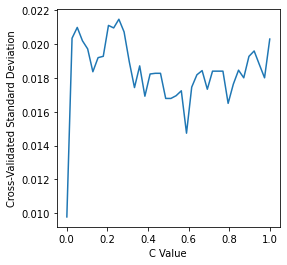

In [10]:
logreg_explore_and_graph(np.linspace(0.001, 1, 40))

In [8]:
logreg = LogisticRegression(C=0.026615384615384617).fit(X_train, y_train)
print(logreg.score(X_train, y_train))
print(logreg.score(X_test, y_test))

0.9616901408450704
0.9166666666666666


/Users/engineer/workspace/cse590-machine-learning/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
